<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Μέρος 1 – Ημι-επιβλεπόμενη Μάθηση

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('wine-missing.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [276]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


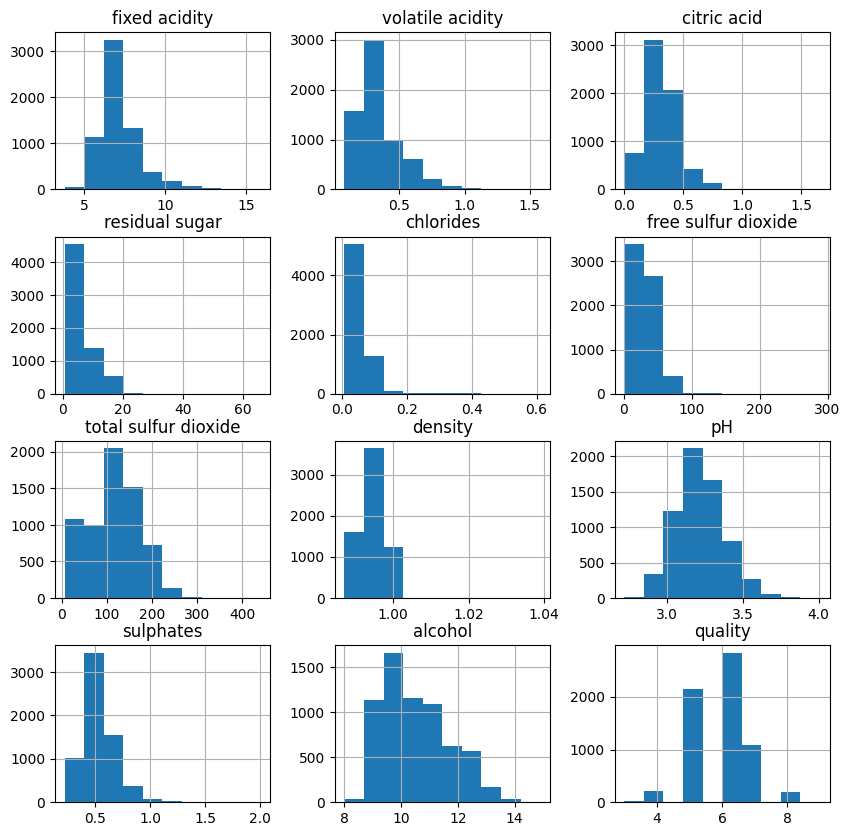

In [277]:
df.hist(figsize=(10, 10))
plt.show()


<Axes: xlabel='type'>

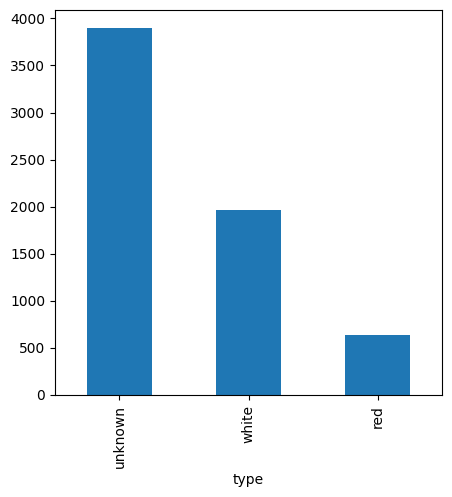

In [278]:
# Bar Plot for ("type")
plt.figure(figsize=(5, 5))
df['type'].value_counts().plot(kind='bar')

In [279]:
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)


Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [280]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)

Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [281]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown': 2})
x = df.drop(columns=['type']).values
y = df['type'].values

In [282]:
known_mask = df['type'] != 2  # Γνωστά δεδομένα
unknown_mask = df['type'] == 2  # Άγνωστα δεδομένα

x_known = x[known_mask]
y_known = y[known_mask]
x_unknown = x[unknown_mask]

In [283]:
# Διαχωρισμός δεδομένων και training
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, random_state=0, stratify=y_known
)

In [284]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [285]:
y_pred = clf.predict(x_test)

In [286]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9935897435897436
F1 Score: 0.9935840982423545
Precision: 0.993582848941563
Recall: 0.9935897435897436


**Accuracy vs F1 Score**

Το Accuracy μετρά τη συνολική ακρίβεια, ενώ το F1 Score είναι πιο ευαίσθητο σε μη ισορροπημένα δεδομένα επειδή συνδυάζει το Precision και το Recall.

Στο παρόν dataset, λόγω της ισορροπίας των κλάσεων και οι δύο μετρήσεις, Accuracy και F1 Score, είναι εξίσου αντιπροσωπευτικές. Σε περίπτωση μη ισορροπημένων δεδομένων, θα προτιμούσαμε το F1 Score.

In [287]:
# Επανεκπαίδευση του μοντέλου με class_weight='balanced'
clf_balanced = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_balanced.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

Η παράμετρος class_weight='balanced' στο Random Forest αυξάνει τη βαρύτητα των δειγμάτων στις λιγότερο συχνές κλάσεις για να διορθώσει τη μεροληψία στα μη ισορροπημένα δεδομένα.

In [288]:
# Επανεκπαίδευση
y_pred_balanced = clf_balanced.predict(x_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced, average='weighted')
precision_balanced = precision_score(y_test, y_pred_balanced, average='weighted')
recall_balanced = recall_score(y_test, y_pred_balanced, average='weighted')

print("Με class_weight='balanced'")
print("Accuracy:", accuracy_balanced)
print("F1 Score:", f1_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)

Με class_weight='balanced'
Accuracy: 0.9948717948717949
F1 Score: 0.9948627235660897
Precision: 0.9948713374047896
Recall: 0.9948717948717949


In [289]:
# Πιθανότητες για τα άγνωστα δείγματα

y_unknown_prob = clf_balanced.predict_proba(x_unknown)
print(y_unknown_proba)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]]


In [290]:
# Ετικέτες για τα άγνωστα δεδομένα

y_unknown_pred = []
for prob in y_unknown_prob:
    if prob[1] > 0.65:
        y_unknown_pred.append(1)  # red
    else:
        y_unknown_pred.append(0)  # white

In [291]:
y_unknown_pred = np.array(y_unknown_pred)
print("Ετικέτες για τα άγνωστα δείγματα:", y_unknown_pred)

Ετικέτες για τα άγνωστα δείγματα: [0 0 0 ... 1 1 1]


In [292]:
# Ένωση συνόλων
x_combined = np.vstack((x_train, x_unknown))
y_combined = np.concatenate((y_train, y_unknown_pred))

In [293]:
# Επανεκπαίδευση Random Forest
clf_final = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_final.fit(x_combined, y_combined)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [294]:
y_final_pred = clf_final.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)

print("Ακρίβεια test set μετά την επανεκπαίδευση:", final_accuracy)

Ακρίβεια test set μετά την επανεκπαίδευση: 0.9935897435897436


Η ακρίβεια φαίνεται ότι μειώθηκε πολύ λίγο. Η προσθήκη ετικέτώνν στα άγνωστα δεδομένα, αύξησε τα δεδομένα, αλλά ταυτόχρονα αυξήθηκε ο θόρυβος και τα λάθη.

# Μέρος 2 - Αξιολόγηση Μοντέλων

In [295]:
# Εισαγωγή dataset
df_full = pd.read_csv('wine-full.csv')
df_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [296]:
df_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [297]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


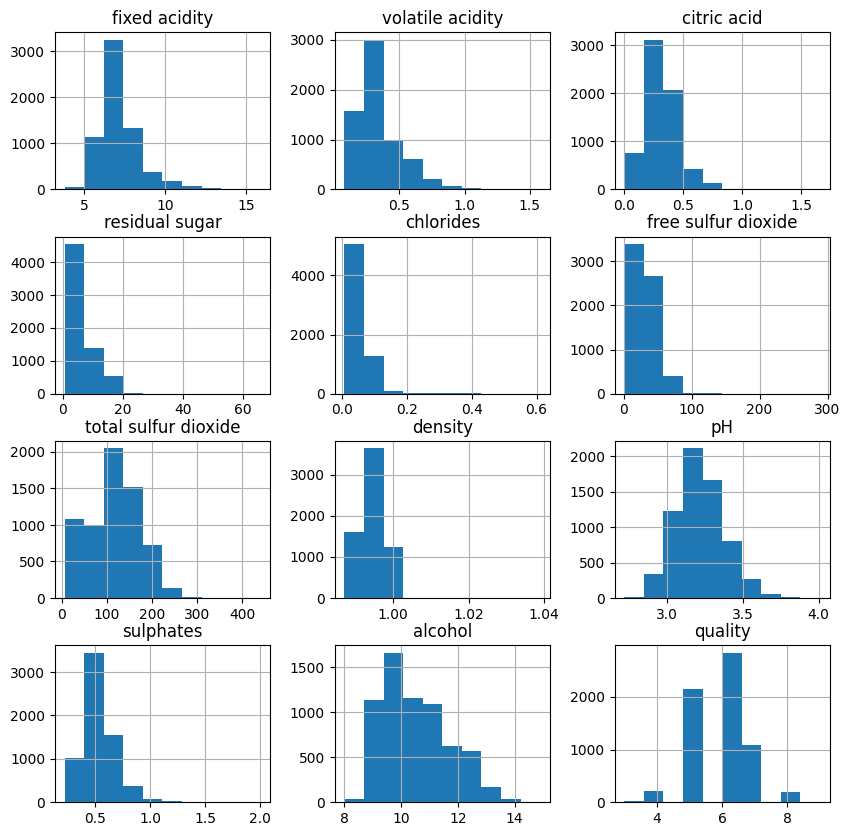

In [298]:
df_full.hist(figsize=(10, 10))
plt.show()


<Axes: xlabel='type'>

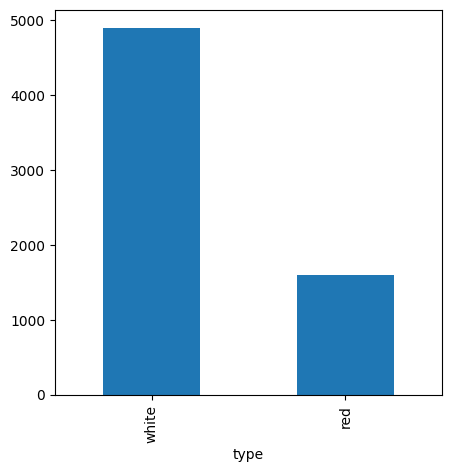

In [299]:
# Bar Plot for ("type")
plt.figure(figsize=(5, 5))
df_full['type'].value_counts().plot(kind='bar')

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


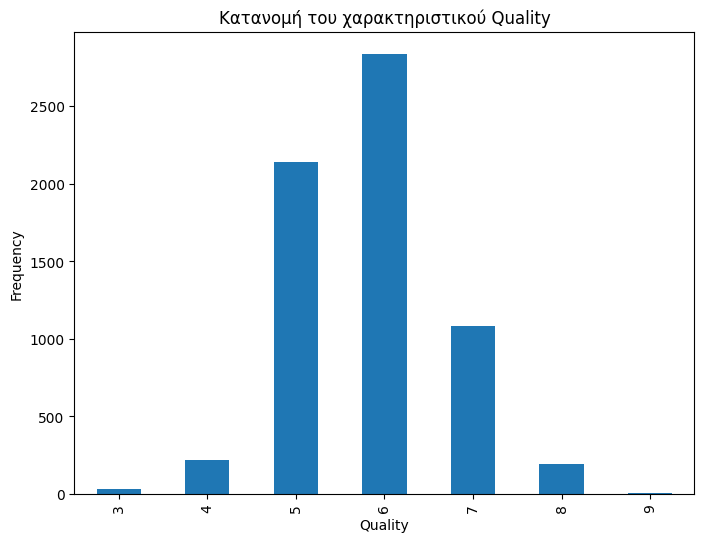

In [300]:
print(df_full['quality'].value_counts())

plt.figure(figsize=(8, 6))
df_full['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Κατανομή του χαρακτηριστικού Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


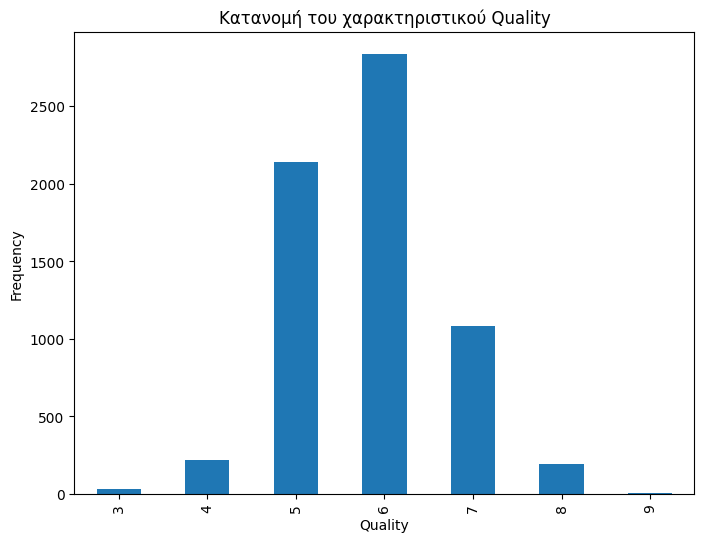

In [301]:
print(df_full['quality'].value_counts())

plt.figure(figsize=(8, 6))
df_full['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Κατανομή του χαρακτηριστικού Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Το dataset δεν είναι ισορροπημένο, καθώς η πλειοψηφία των δειγμάτων συγκεντρώνεται στις μεσαίες κατηγορίες ποιότητας, ενώ οι ακραίες τιμές υποεκπροσωπούνται.

In [302]:
# Ποιότητα λευκού και κόκκινου κρασιού

quality_by_type = df_full.groupby('type')['quality'].mean()
print("Μέση ποιότητα για κάθε τύπο κρασιού:\n", quality_by_type)

Μέση ποιότητα για κάθε τύπο κρασιού:
 type
red      5.636023
white    5.877909
Name: quality, dtype: float64


/tmp/ipython-input-3073603115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='quality', data=df_full, palette='Set2')


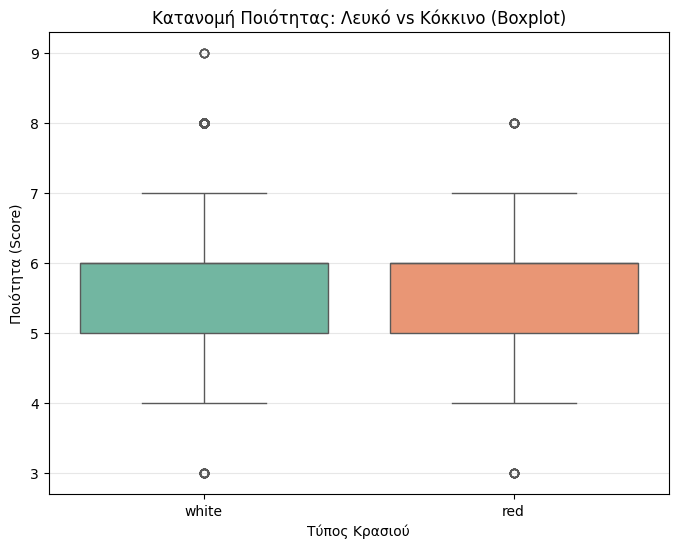

In [303]:
# Plot 1: Boxplot - Δείχνει την κατανομή και τη διάμεσο
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='quality', data=df_full, palette='Set2')
plt.title('Κατανομή Ποιότητας: Λευκό vs Κόκκινο (Boxplot)')
plt.xlabel('Τύπος Κρασιού')
plt.ylabel('Ποιότητα (Score)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Όπως φαίνεται στο Boxplot και στην μέση ποι, η κατανομή των βαθμολογιών του λευκού είναι ελαφρώς μετατοπισμένη προς υψηλότερες τιμές από το κόκκινο

Συντελεστής Συσχέτισης (Sugar vs Quality): -0.0368


/tmp/ipython-input-449157768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sugar_category', y='quality', data=df, palette='coolwarm')


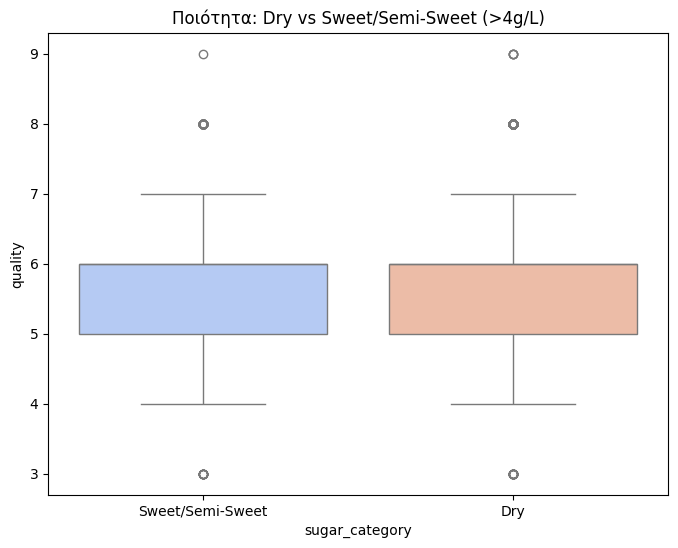

In [304]:
# Γλυκά vs Ξηρά Κρασιά

correlation = df['residual sugar'].corr(df['quality'])
print(f"Συντελεστής Συσχέτισης (Sugar vs Quality): {correlation:.4f}")

df['sugar_category'] = df['residual sugar'].apply(lambda x: 'Sweet/Semi-Sweet' if x > 5 else 'Dry')

plt.figure(figsize=(8, 6))
sns.boxplot(x='sugar_category', y='quality', data=df, palette='coolwarm')
plt.title('Ποιότητα: Dry vs Sweet/Semi-Sweet (>4g/L)')
plt.show()

In [305]:
print("Μέση ποιότητα ανά κατηγορία ζάχαρης:")
print(df.groupby('sugar_category')['quality'].mean())

Μέση ποιότητα ανά κατηγορία ζάχαρης:
sugar_category
Dry                 5.842722
Sweet/Semi-Sweet    5.781274
Name: quality, dtype: float64


Ο συντελεστής συσχέτισης μεταξύ residual sugar και quality είναι πολύ χαμηλός (κοντά στο 0), υποδεικνύοντας ότι η ποσότητα σακχάρων δεν επηρεάζει γραμμικά την ποιότητα.
Αυτό φαίνεται και από την μέση ποιότητα ανά κατηγορία, που οι τιμές είναι πολύ κοντά.

In [306]:
# Αφαίρεση residual sugar
df_full = df_full.drop(columns=['residual sugar'])

In [307]:
df_full['type'] = df_full['type'].map({'white': 0, 'red': 1})

In [308]:
missing_values = df_full.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)


Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [309]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)

Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
sugar_category          0
dtype: int64


In [310]:
# Διαχωρισμός Features (X) και Target (y) σε 90-10

X = df_full.drop(columns=['quality'])
y = df_full['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print("Διαστάσεις X_train:", X_train.shape)
print("Διαστάσεις X_test: ", X_test.shape)
print("Διαστάσεις y_train:", y_train.shape)
print("Διαστάσεις y_test: ", y_test.shape)

Διαστάσεις X_train: (5847, 11)
Διαστάσεις X_test:  (650, 11)
Διαστάσεις y_train: (5847,)
Διαστάσεις y_test:  (650,)


In [311]:
# Εκπαίδευση μοντέλου

dt_regressor = DecisionTreeRegressor(random_state=0)

dt_regressor.fit(X_train, y_train)

y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE) στο Test Set: {mae:.4f}")


Mean Absolute Error (MAE) στο Test Set: 0.4585


In [312]:
# Επανάληψη για 10 διαφορετικά seed

mae_scores = []

for seed in range(10):
    #Διαχωρισμός
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

    regressor = DecisionTreeRegressor(random_state=0)

    # Εκπαίδευση
    regressor.fit(X_train, y_train)

    # Πρόβλεψη και υπολογισμός MAE
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

# Υπολογισμός Μέσου Όρου και Τυπικής απόκλισης
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f"Λίστα MAE για κάθε seed: {mae_scores}")
print("-" * 30)
print(f"Μέσος Όρος MAE: {mean_mae:.4f}")
print(f"Τυπική Απόκλιση (Std) MAE: {std_mae:.4f}")

Λίστα MAE για κάθε seed: [0.4584615384615385, 0.48923076923076925, 0.4553846153846154, 0.4338461538461538, 0.4646153846153846, 0.4584615384615385, 0.47384615384615386, 0.45076923076923076, 0.46923076923076923, 0.5015384615384615]
------------------------------
Μέσος Όρος MAE: 0.4655
Τυπική Απόκλιση (Std) MAE: 0.0183


Με τον υπολογισμό του μέσου όρου και της τυπικής απόκλισης, μπορούμε να είμαστε πιο βέβαιοι για το αναμενόμενο σφάλμα, ορίζοντας ένα διάστημα εμπιστοσύνης (εύρος)

In [313]:
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0
)

print(f"New Train shape: {X_train_new.shape} (~70%)")
print(f"Validation shape: {X_val.shape} (~20%)")
print(f"Test shape: {X_test.shape} (10%)")
print("-" * 40)

max_depths = [8, 10, 12, 15, None]
min_samples = [2, 10, 20]
results = []
counter = 0

print(f"{'Comb':<5} {'Max Depth':<12} {'Min Samples':<12} {'Train MAE':<12} {'Val MAE':<12}")

for depth in max_depths:
    for split in min_samples:
        if counter >= 15: break

        # Αρχικοποίηση & Εκπαίδευση
        model = DecisionTreeRegressor(max_depth=depth, min_samples_split=split, random_state=0)
        model.fit(X_train_new, y_train_new)

        # Υπολογισμός Σφάλματος
        mae_train = mean_absolute_error(y_train_new, model.predict(X_train_new))
        mae_val = mean_absolute_error(y_val, model.predict(X_val))

        # Αποθήκευση και εκτύπωση
        results.append((depth, split, mae_train, mae_val))
        print(f"{counter+1:<5} {str(depth):<12} {split:<12} {mae_train:.4f}       {mae_val:.4f}")

        counter += 1

New Train shape: (4677, 11) (~70%)
Validation shape: (1170, 11) (~20%)
Test shape: (650, 11) (10%)
----------------------------------------
Comb  Max Depth    Min Samples  Train MAE    Val MAE     
1     8            2            0.4552       0.5794
2     8            10           0.4669       0.5743
3     8            20           0.4816       0.5790
4     10           2            0.3509       0.5465
5     10           10           0.3917       0.5464
6     10           20           0.4344       0.5636
7     12           2            0.2447       0.5335
8     12           10           0.3186       0.5395
9     12           20           0.3843       0.5617
10    15           2            0.1117       0.5044
11    15           10           0.2335       0.5270
12    15           20           0.3362       0.5607
13    None         2            0.0000       0.4897
14    None         10           0.1788       0.5236
15    None         20           0.3121       0.5624


Μετά από αρκετές δοκιμές, κρατάμε το max_depth=15 και min_samples = 2

In [314]:
best_depth = 15
best_split = 2

final_model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_split, random_state=0)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)

final_mae = mean_absolute_error(y_test, y_pred_final)

print(f"Τελικό MAE στο Test Set με max_depth=15 και min_samples = 2: {final_mae:.4f}")

Τελικό MAE στο Test Set με max_depth=15 και min_samples = 2: 0.5229


In [320]:
# GridSearch

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 10, 12, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    cv=10,                # 10-Fold Cross Validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,            # Χρήση όλων των πυρήνων του επεξεργαστή
)

print("Εκτέλεση Grid Search...")
grid_search.fit(X_train, y_train)

print("\nΒέλτιστες παράμετροι:", grid_search.best_params_)
print(f"Καλύτερο MAE: {-grid_search.best_score_:.4f}")

# Κρατάμε το καλύτερο μοντέλο για το επόμενο ερώτημα
best_model_grid = grid_search.best_estimator_

Εκτέλεση Grid Search...

Βέλτιστες παράμετροι: {'max_depth': None, 'min_samples_split': 2}
Καλύτερο MAE: 0.4881


In [321]:
from sklearn.metrics import mean_absolute_error

# Πρόβλεψη στο Test Set με το καλύτερο μοντέλο του GridSearch
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)


final_mae_grid = mean_absolute_error(y_test, y_pred_grid)

print(f"Τελικό MAE στο Test Set (GridSearch Model): {final_mae_grid:.4f}")

Τελικό MAE στο Test Set (GridSearch Model): 0.5015


In [322]:
from sklearn.tree import plot_tree

# Σταθερό max_depth=5
# Ψάχνουμε το ιδανικό min_samples_split
param_grid_simple = {
    'max_depth': [5],
    'min_samples_split': [2, 5, 10, 20, 50]
}

grid_search_tree = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid_simple,
    cv=10,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_

print("Καλύτερο μοντέλο με depth = 5):", grid_search_tree.best_params_)

Καλύτερο μοντέλο με depth = 5): {'max_depth': 5, 'min_samples_split': 10}


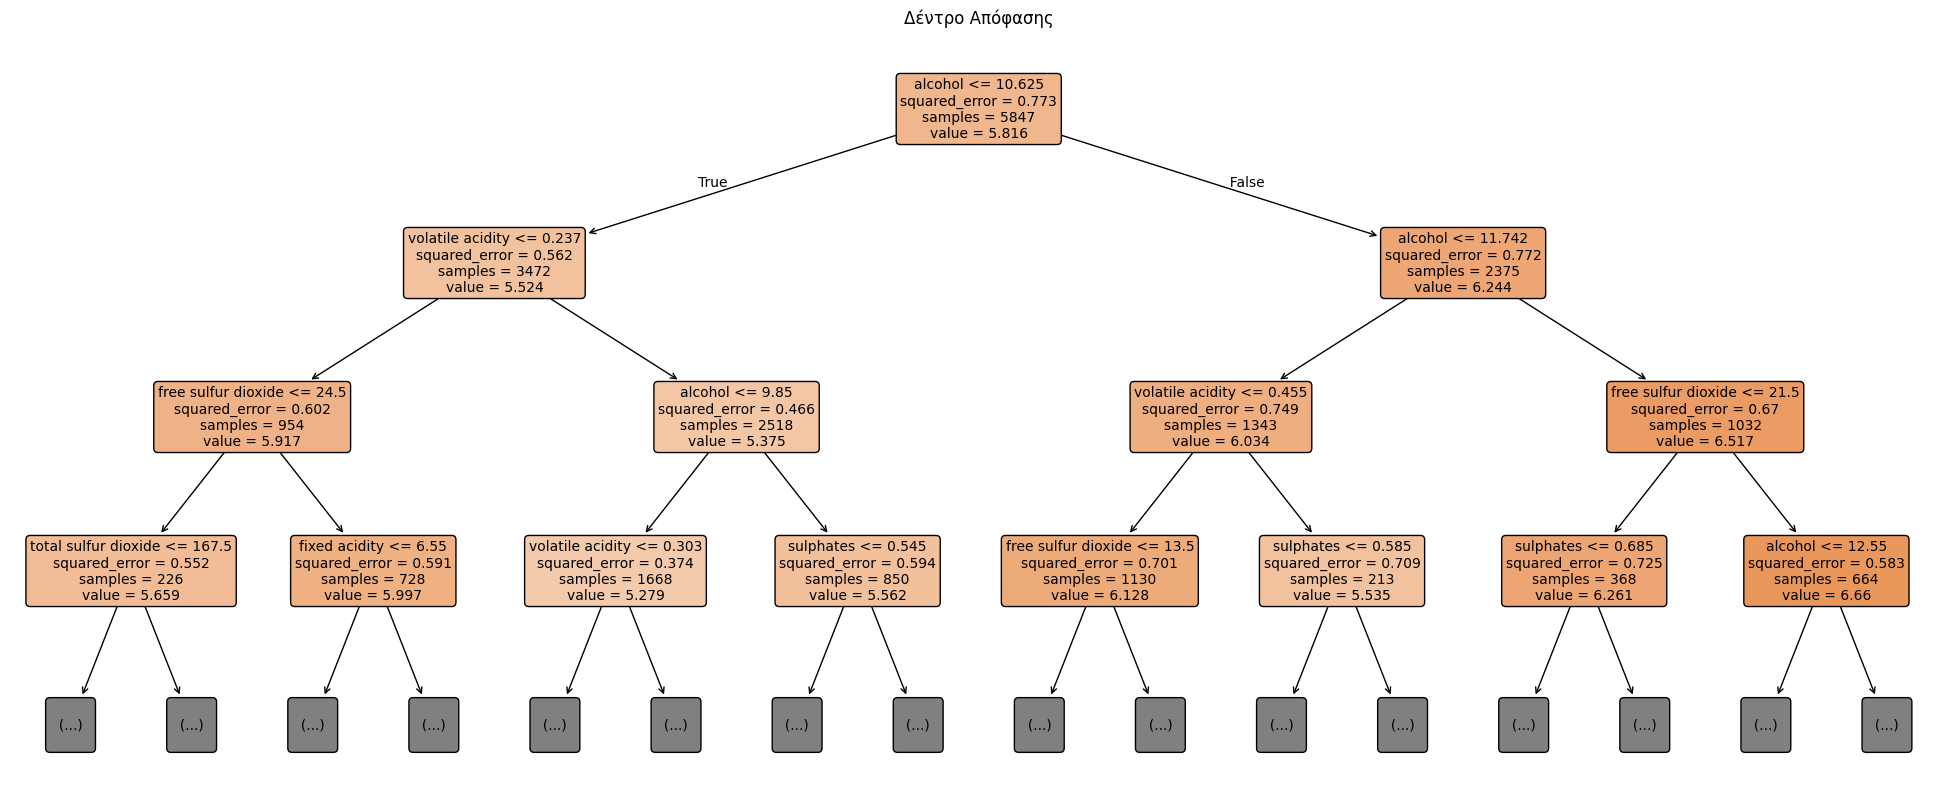

In [324]:
# Εμφάνιση του Plot tree
plt.figure(figsize=(25, 10))
plot_tree(best_tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3) # Δείχνουμε μόνο τα 3 πρώτα επίπεδα
plt.title("Δέντρο Απόφασης")
plt.show()

Αν το Alcohol είναι μεγαλύτερο από 10.6 τότε η ποιότητα ανεβαίνει κατευθείαν πάνω από το 5.5

Επιπλέον: Αν το Αλκοόλ είναι ακόμα υψηλότερο από 11.75, η ποιότητα πηγαίνει μεγαλύτερη του 6.2

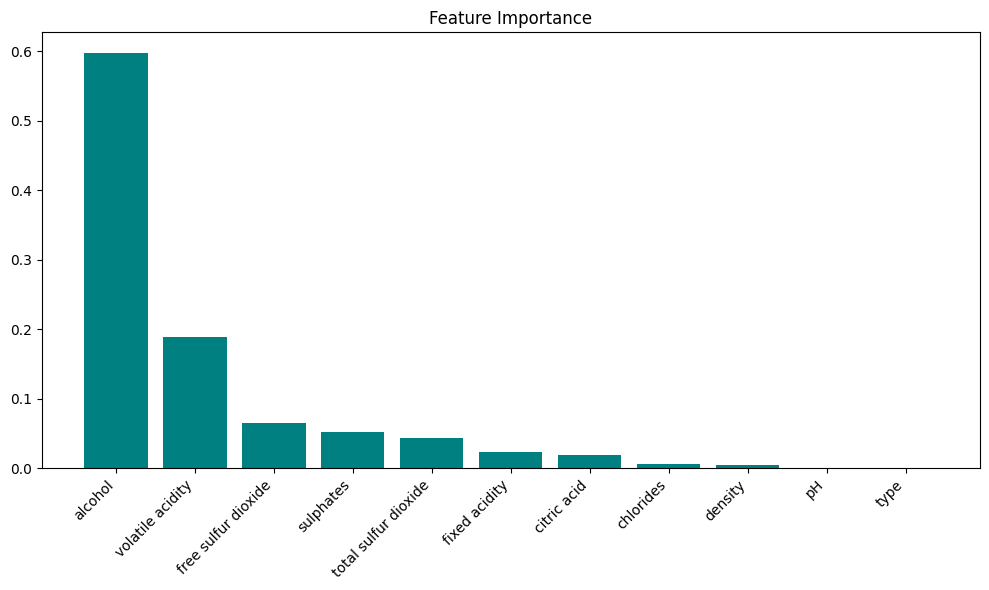

Feature Ranking:
1. alcohol (0.5971)
2. volatile acidity (0.1888)
3. free sulfur dioxide (0.0650)
4. sulphates (0.0519)
5. total sulfur dioxide (0.0436)
6. fixed acidity (0.0236)
7. citric acid (0.0188)
8. chlorides (0.0065)
9. density (0.0046)
10. pH (0.0000)
11. type (0.0000)


In [325]:
# Feature Importance
importances = best_tree_model.feature_importances_
indices = np.argsort(importances)[::-1] # Ταξινόμηση από το μεγαλύτερο στο μικρότερο

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Εκτύπωση σημαντικότητας για να δούμε τα ποσοστά
print("Feature Ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

Όπως φαίνεται στο ραβδόγραμμα, το χαρακτηριστικό Alcohol παίζει τον καθοριστικότερο ρόλο στην πρόβλεψη της ποιότητας, κατέχοντας το μεγαλύτερο ποσοστό σημαντικότητας 0.59
Δεύτερο πιο σημαντικό είναι το Volatile acidity με 0.18, ενώ τα υπόλοιπα δεν έχουν μεγάλο ποσοστό σημαντικότητας.